# QN 2

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

# 2(a). [5 points] Load the data and plot it.

## Load the data into a dataframe

In [21]:
with open('data/2/hw1x.dat', 'r') as f1:
    # next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f1)
    df.rename(columns={0: 'x'}, inplace=True)

with open('data/2/hw1y.dat', 'r') as f2:
    # next(f) # skip first row
    dfy = pd.DataFrame(l.rstrip().split() for l in f2)
    dfy.rename(columns={0: 'y'}, inplace=True)

In [22]:
df['y'] = dfy['y']
# df.drop(df.tail(1).index,inplace=True)
df.dropna(inplace=True)
df=df.astype(float)
df

,x,y
0,0.01,3.557667
1,0.02,4.873885
2,0.03,0.801153
3,0.04,3.942173
4,0.05,3.418765
5,0.06,1.812312
6,0.07,2.706408
7,0.08,3.502625
8,0.09,6.758397
9,0.10,5.969437


## Plot the data based on the dataframe columns

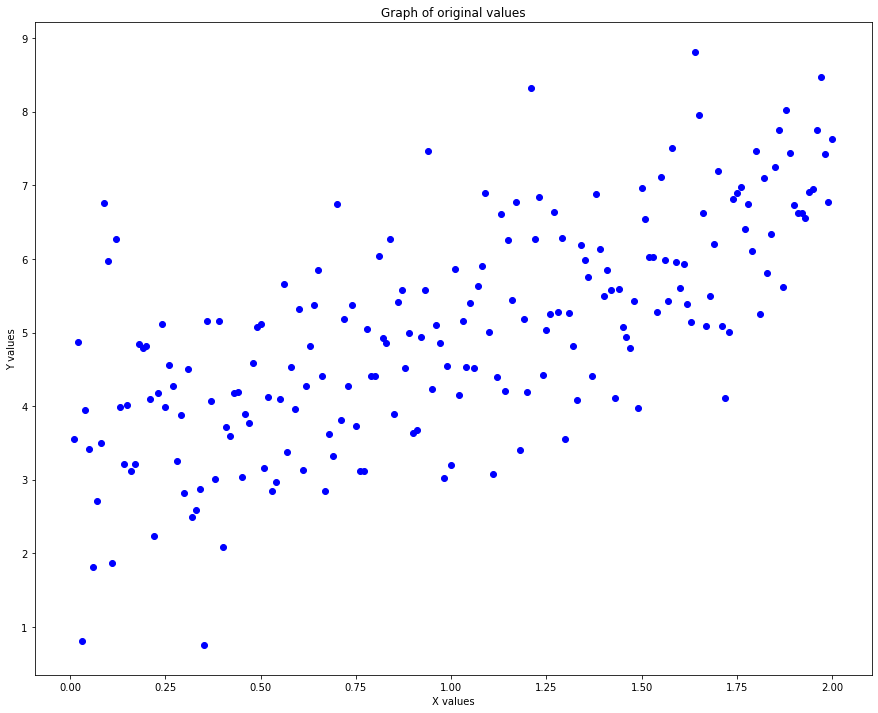

In [23]:
plt.figure(figsize=(15,12))
plt.scatter(x=df['x'], y=df['y'], color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Graph of original values')
plt.show()

# 2(b) [5 points] Add a column vector of 1s to the inputs, write a function implementing the closed form linear regression formula discussed in class to obtain the weight vector $\theta$. Plot both the linear regression line and the data on the same graph.

## Function to get weight vector

In [24]:
def closed_form_linear_regression_get_weight(df=df):
    df_copy = df.copy(deep=True)
    ## Load the labels and add a column of 1s to the inputs
    x = np.array(df_copy['x'])
    y = np.array(df_copy['y'])
    x = np.c_[x, np.ones(len(df_copy))]
    # print('The x vector is: \n {}'.format(x))
    # print('The y vector is: \n {}'.format(y))
    # Compute Matrix A and Vector B
    a = (1/len(df_copy)) * np.transpose(x).dot(x)
    b = (1/len(df_copy)) * np.transpose(x).dot(y)
    # print('Matrix A is: \n {}'.format(a))
    # print('Vector B is: \n {}'.format(b))
    # Compute the weight
    weight = np.dot(np.linalg.inv(a), b)
    return weight
weight_closed_form_linear_regression = closed_form_linear_regression_get_weight(df)
print ('The weight for closed form linear regression is: {}'.format(weight_closed_form_linear_regression))

The weight for closed form linear regression is: [1.78157138 3.2447227 ]


## Function to compute prediction and plot

In [25]:
def predict(weight, x, y, df=df):
    df_copy = df.copy(deep=True)
    x = np.c_[x, np.ones(len(df))]
    prediction = x.dot(weight)
    df_copy['predict'] = prediction
    return df_copy

In [26]:
def plot_label_prediction(df=df):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['x'], y=df['y'], color='b')
    plt.scatter(x=df['x'], y=df['predict'], color='r')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    blue_patch = mpatches.Patch(color='blue', label='Original labels')
    red_patch = mpatches.Patch(color='red', label='Predicted labels')
    plt.legend(handles=[blue_patch, red_patch])
    plt.title('Graph of predictions (red) and original labels (blue)')
    plt.show()

## Compute the weights and plot the graph

[1.78157138 3.2447227 ]


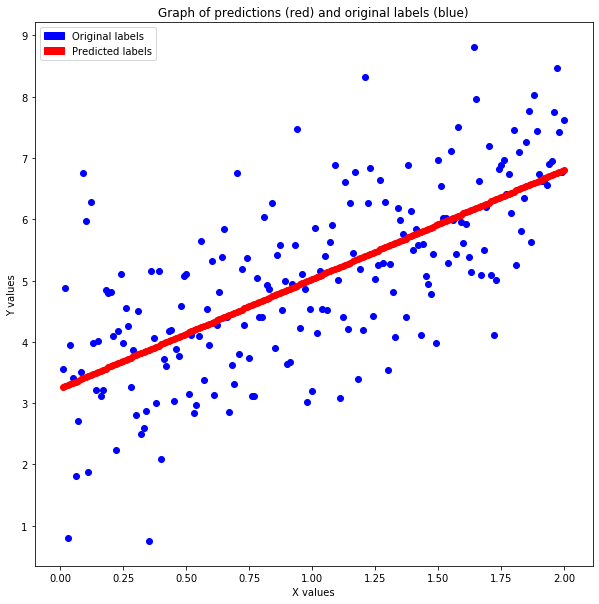

In [27]:
weight_closed_form = closed_form_linear_regression_get_weight(df)
print(weight_closed_form)
df_closed_form = predict(weight_closed_form, np.array(df['x']), np.array(df['y']), df)
plot_label_prediction(df_closed_form)

# 2(c) [5 points] Write a function that will evaluate the training error in terms of empirical risk of the resulting fit in 2(b) and report the error.

In [28]:
# Formula for empirical risk is in Lecture 4 slides

def evaluate_training_error(x, y, weight):
    total_entries = len(df)
    x = np.c_[x, np.ones(len(df))]
    total_loss = 0.0
    for i in range(total_entries):
        total_loss += np.power(y[i] - weight.dot(x[i]), 2) / 2
    training_loss = total_loss / total_entries
    return training_loss
training_error_closed_form = evaluate_training_error(np.array(df['x']), np.array(df['y']), weight_closed_form)
print('The training error in terms of empirical risk of the resulting fit in 2(b) is \n{}'.format(training_error_closed_form))

The training error in terms of empirical risk of the resulting fit in 2(b) is 
0.5812605752543936


# 2(d) [10 points] Write a function to calculate the weight vector $\theta$ using gradient descent. Consider learning rate $\eta$ = 0.01 and number of iterations as 100. Report $\theta$ for minimum empirical risk from all the iterations.

In [29]:
learning_rate_gradient_descent = 0.01
iterations_gradient_descent = 100


def gradient_descent_get_weight(learning_rate, iterations, df=df):
    weight_gradient_descent = np.zeros(2)
    x = np.array(df['x'])
    y = np.array(df['y'])
    x = np.c_[x, np.ones(len(df))]
    total_loss = 0.0
    average_loss_reference = float('inf') # So that when loss decreases we can override the weight
    number_of_data = len(df)
    for i in range(iterations):
        for j in range(number_of_data):
            weight_gradient_descent += learning_rate * (y[j] - weight_gradient_descent.dot(x[j])) * x[j]
            total_loss += np.power(y[j] - weight_gradient_descent.dot(x[j]), 2) / 2
            average_loss = total_loss / (j + 1)
            # At this stage, loss can go up so we won't want this particular weight but if loss goes down, update the weight
            if average_loss < average_loss_reference:
                average_loss_reference = average_loss
                final_weight_gradient_descent = weight_gradient_descent
    return final_weight_gradient_descent


weight_gradient_descent = gradient_descent_get_weight(learning_rate_gradient_descent, iterations_gradient_descent, df)
print('The weight for minimum empirical risk from all iterations is \n{}'.format(weight_gradient_descent))

The weight for minimum empirical risk from all iterations is 
[1.96402963 3.13074422]


# 2(e) [10 points] Write a function to calculate the weight vector $\theta$ using stochastic gradient descent. Consider learning rate $\eta$ = 0.01 and number of iterations as 50. Report $\theta$ for minimum empirical risk from all the iterations

In [30]:
learning_rate_stochastic_gradient_descent = 0.01
iterations_stochastic_gradient_descent = 50

def stochastic_gradient_descent_get_weight(learning_rate, iterations, df=df):
    random.seed(1)
    weight_gradient_descent = np.zeros(2)
    x = np.array(df['x'])
    y = np.array(df['y'])
    x = np.c_[x, np.ones(len(df))]
    total_loss = 0.0
    average_loss_reference = float('inf') # So that when loss decreases we can override the weight
    random_range = len(df)
    for i in range(iterations):
        data_order = random.sample(range(0, random_range), random_range)
        for index in data_order:                                   
            weight_gradient_descent += learning_rate * (y[index] - weight_gradient_descent.dot(x[index])) * x[index]
            total_loss += np.power(y[index] - weight_gradient_descent.dot(x[index]), 2) / 2
            average_loss = total_loss / (i + 1)
            if average_loss < average_loss_reference:
                average_loss_reference = average_loss
                final_weight_gradient_descent = weight_gradient_descent
    return final_weight_gradient_descent
weight_stochastic_gradient_descent = stochastic_gradient_descent_get_weight(learning_rate_stochastic_gradient_descent, iterations_stochastic_gradient_descent, df)
print('The weight for minimum empirical risk from all iterations is \n{}'.format(weight_stochastic_gradient_descent))

The weight for minimum empirical risk from all iterations is 
[1.77778986 3.26115672]


# 2(f) [10 points] Write a function called PolyRegress(x,y,d) which adds the features x<sup>2</sup>, x <sup>3</sup>, ... x <sup>d</sup> to the inputs and performs polynomial regression using closed form solution.

In [31]:
def polyRegress(x, y, d):
    number_of_data_points = x.shape[0]
    orig_x = x
    if d >= 2:
        for dimension in range(2, d + 1):
            x_dimension = np.power(orig_x, dimension)
            # Add the dimension to the end of the x
            x = np.column_stack((x, x_dimension))
    # Add the column of 1s
    x_with_one = np.c_[x, np.ones(number_of_data_points)]
    # Compute a and b
    a = (1/number_of_data_points * np.transpose(x_with_one).dot(x_with_one))
    b = (1/number_of_data_points * np.transpose(x_with_one).dot(y))
    # print('Matrix A is: \n {}'.format(a))
    # print('Vector B is: \n {}'.format(b))
    # Compute the weight
    weight = np.dot(np.linalg.inv(a), b)
    print ('The weight for closed form linear regression for x^{} is: \n{}'.format(d, weight))
    return x, weight


x_2, x_2_weight = polyRegress(np.array(df['x']), np.array(df['y']), 2)

The weight for closed form linear regression for x^2 is: 
[0.78341361 0.49659591 3.58076915]


# 2(g) [5 points] Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Is this a better fit? Repeat the same for 3rd order fit to 9th order fit. After which order fit does the error get worse?

The weight for closed form linear regression for x^2 is: 
[0.78341361 0.49659591 3.58076915]
The training error for x^2 is 
0.5703016121648224


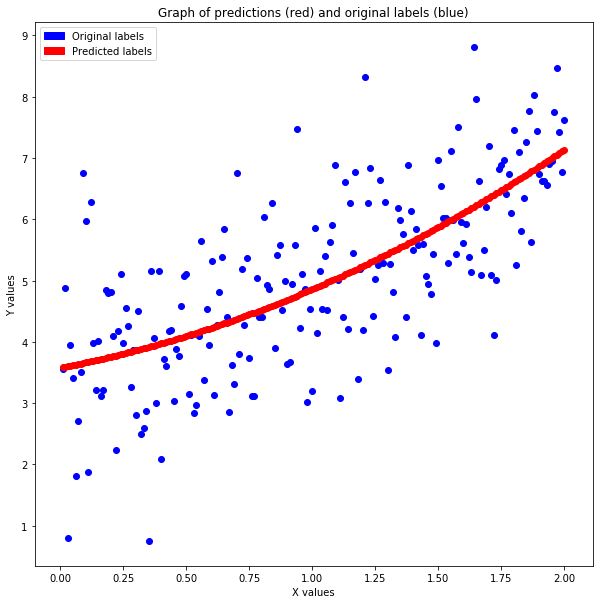

In [32]:
# Get the error for quadratic fit and plot the data
x_2, x_2_weight = polyRegress(np.array(df['x']), np.array(df['y']), 2)
df_x2 = predict(x_2_weight, x_2, np.array(df['y']), df)
training_error_x_2 = evaluate_training_error(x_2, df['y'], x_2_weight)
print('The training error for x^2 is \n{}'.format(training_error_x_2))
plot_label_prediction(df_x2)

The weight for closed form linear regression for x^2 is: 
[0.78341361 0.49659591 3.58076915]
The training error for x^2 is 
0.5703016121648224


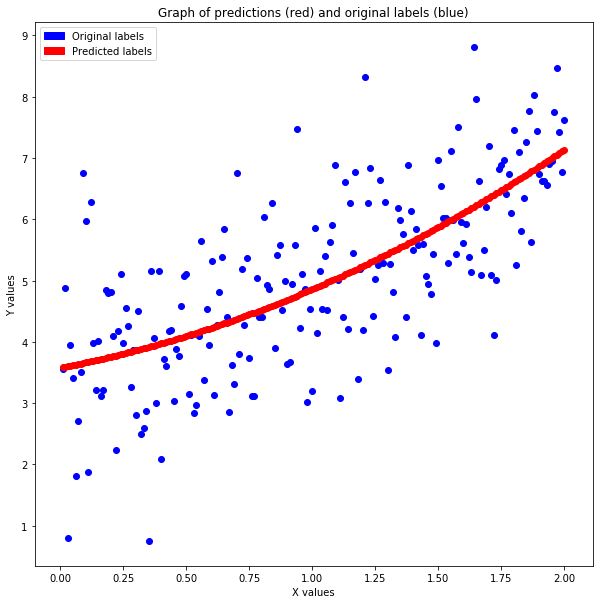

The weight for closed form linear regression for x^3 is: 
[1.11846512 0.08090267 0.13787504 3.52394943]
The training error for x^3 is 
0.5700844364691349


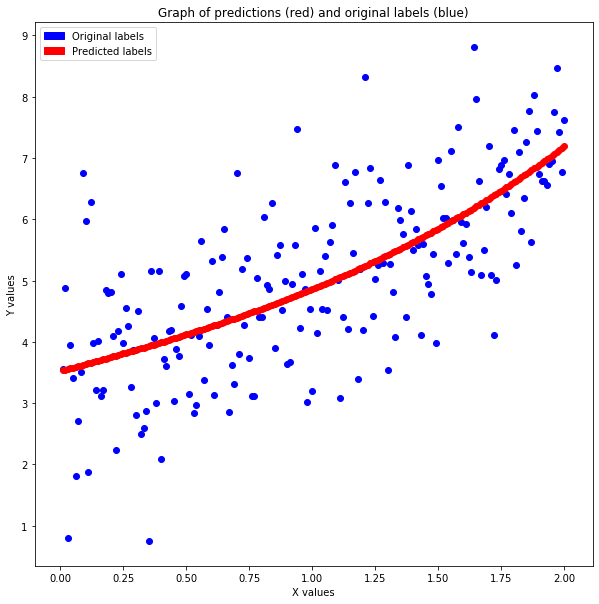

The weight for closed form linear regression for x^4 is: 
[-2.09126966  7.22513464 -5.38187521  1.3730722   3.85376334]
The training error for x^4 is 
0.5646163879286427


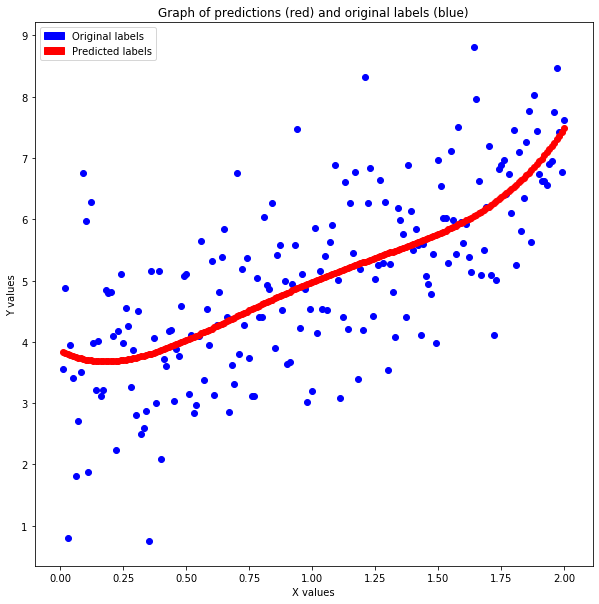

The weight for closed form linear regression for x^5 is: 
[-0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956  3.7181433 ]
The training error for x^5 is 
0.5638968184749199


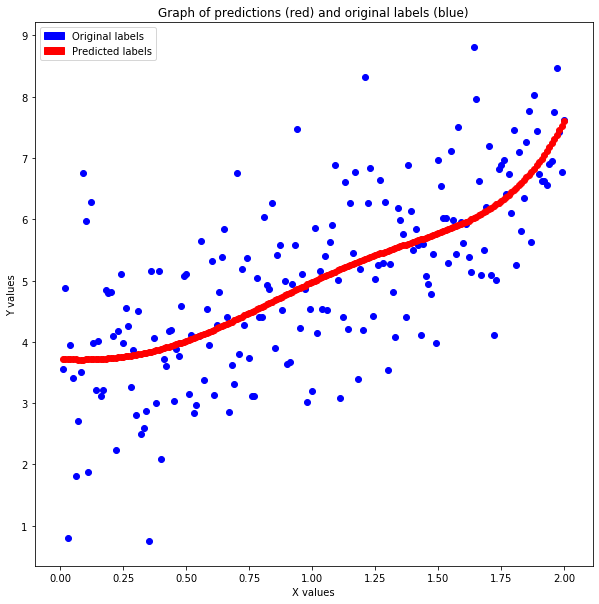

The weight for closed form linear regression for x^6 is: 
[  5.56010885 -27.43134444  58.72902222 -54.95621259  23.44890148
  -3.72427727   3.43194652]
The training error for x^6 is 
0.5613433038902953


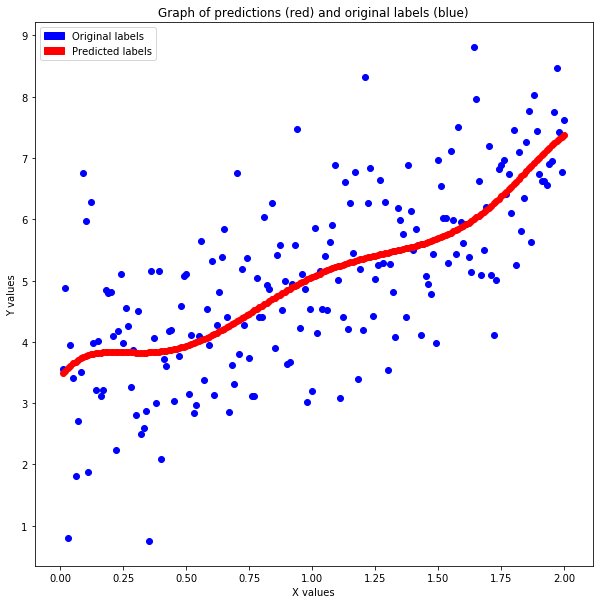

The weight for closed form linear regression for x^7 is: 
[  17.3114673  -104.72227912  270.37451239 -343.19084352  229.48681942
  -77.69332825   10.51443512    2.98164468]
The training error for x^7 is 
0.5562352515818955


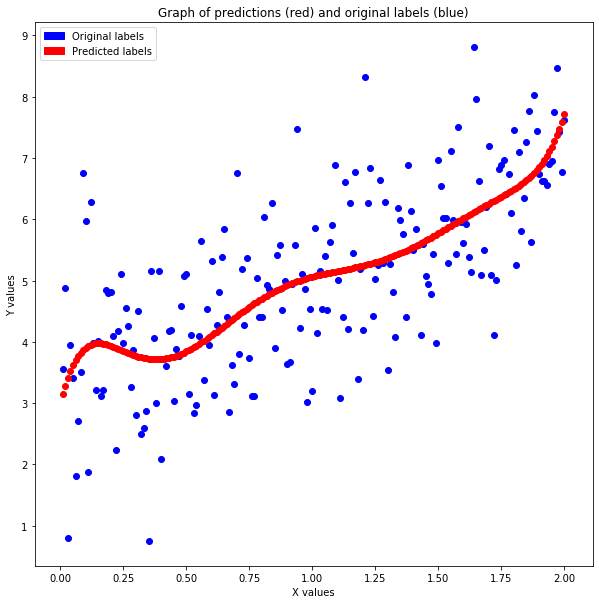

The weight for closed form linear regression for x^8 is: 
[  28.70152146 -201.17758805  617.80818915 -987.05634451  893.36494207
 -462.31539321  127.58317083  -14.56078754    2.63575715]
The training error for x^8 is 
0.5537805799114248


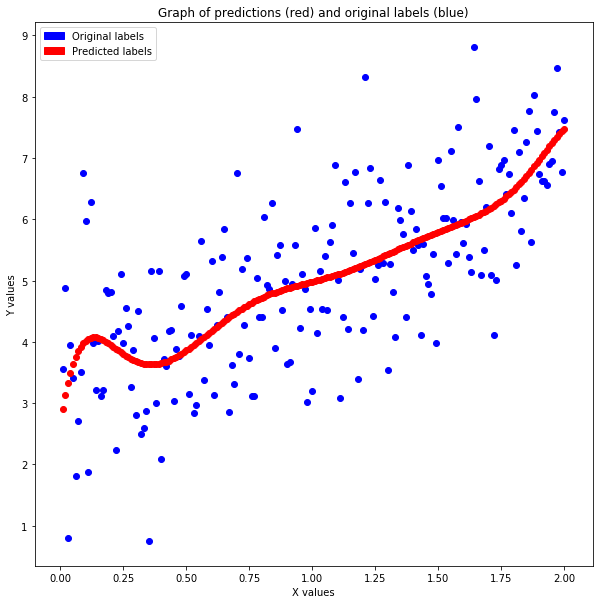

The weight for closed form linear regression for x^9 is: 
[   37.81742316  -297.49167871  1057.60617256 -2044.05599213
  2358.11627197 -1673.23023987   716.7915535   -170.18796539
    17.20585519     2.40963278]
The training error for x^9 is 
0.5529231266275894


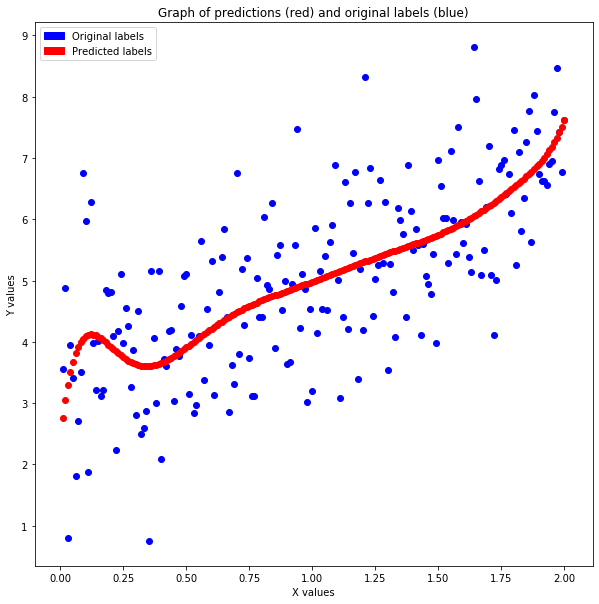

In [33]:
# Repeating for the rest of the values
def gatherFitForDimensions(lowerBound, upperBound, df=df):
    dimension = []
    training_error = []
    for dimensions in range(lowerBound, upperBound + 1):
        dimension.append(dimensions)
        x, x_weight = polyRegress(np.array(df['x']), np.array(df['y']), dimensions)
        df_x = predict(x_weight, x, np.array(df['y']), df)
        training_error_x = evaluate_training_error(x, df['y'], x_weight)
        training_error.append(training_error_x)
        print('The training error for x^{} is \n{}'.format(dimensions, training_error_x))
        plot_label_prediction(df_x)
    return dimension, training_error

dimension, training_error = gatherFitForDimensions(2, 9)

In [34]:
error_frame = pd.DataFrame()
error_frame['dimension'] = dimension
error_frame['error'] = training_error
error_frame

,dimension,error
0,2,0.570302
1,3,0.570084
2,4,0.564616
3,5,0.563897
4,6,0.561343
5,7,0.556235
6,8,0.553781
7,9,0.552923


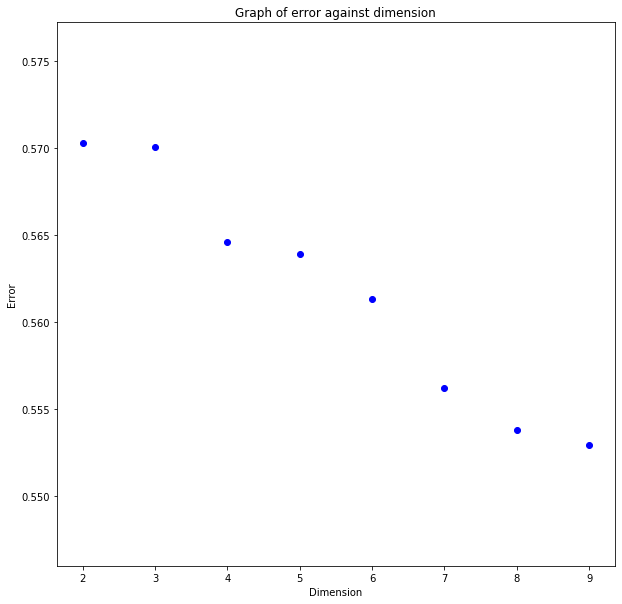

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(x=error_frame['dimension'], y=error_frame['error'], color='b')
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Graph of error against dimension')
plt.show()

In [36]:
min_error = min(error_frame['error'])
min_dimension = error_frame.loc[error_frame['error']==min_error, 'dimension'].iloc[0]
print('Dimension {} has the smallest error, with an error of {}'.format(min_dimension, min_error))

Dimension 9 has the smallest error, with an error of 0.5529231266275894


### Try for more dimensions and see if the Error increases

The weight for closed form linear regression for x^2 is: 
[0.78341361 0.49659591 3.58076915]
The training error for x^2 is 
0.5703016121648224


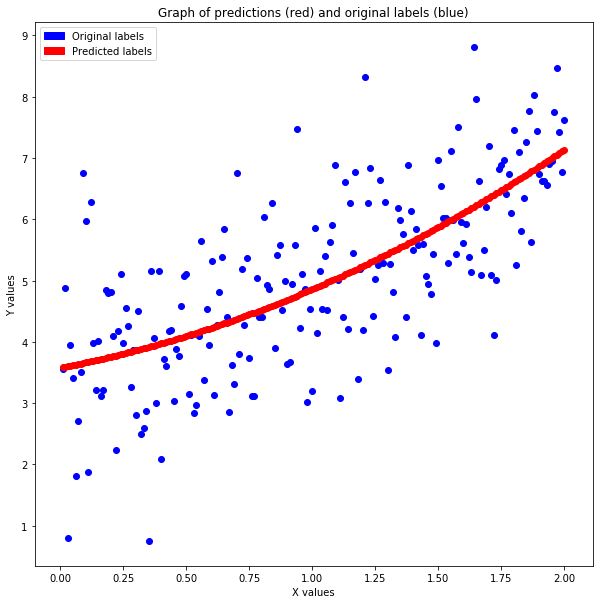

The weight for closed form linear regression for x^3 is: 
[1.11846512 0.08090267 0.13787504 3.52394943]
The training error for x^3 is 
0.5700844364691349


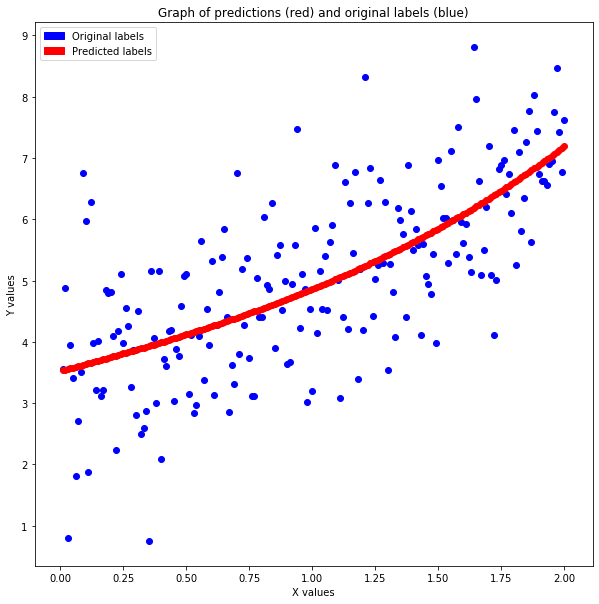

The weight for closed form linear regression for x^4 is: 
[-2.09126966  7.22513464 -5.38187521  1.3730722   3.85376334]
The training error for x^4 is 
0.5646163879286427


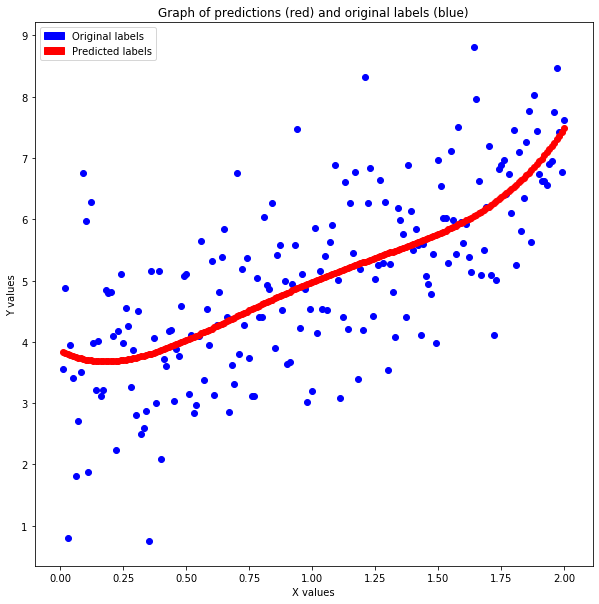

The weight for closed form linear regression for x^5 is: 
[-0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956  3.7181433 ]
The training error for x^5 is 
0.5638968184749199


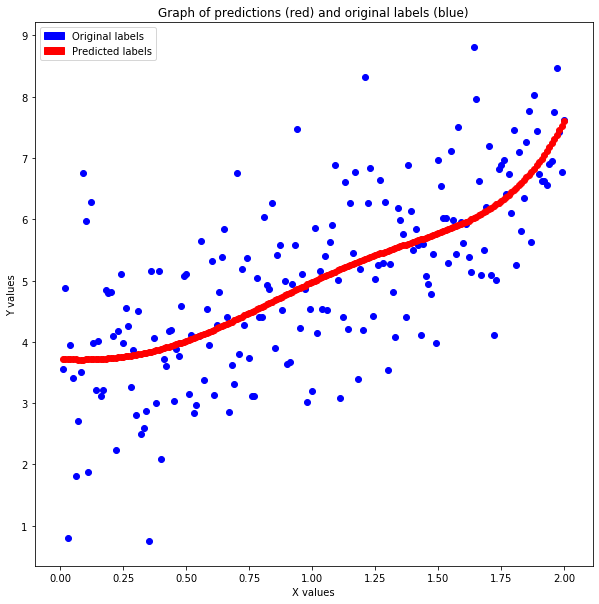

The weight for closed form linear regression for x^6 is: 
[  5.56010885 -27.43134444  58.72902222 -54.95621259  23.44890148
  -3.72427727   3.43194652]
The training error for x^6 is 
0.5613433038902953


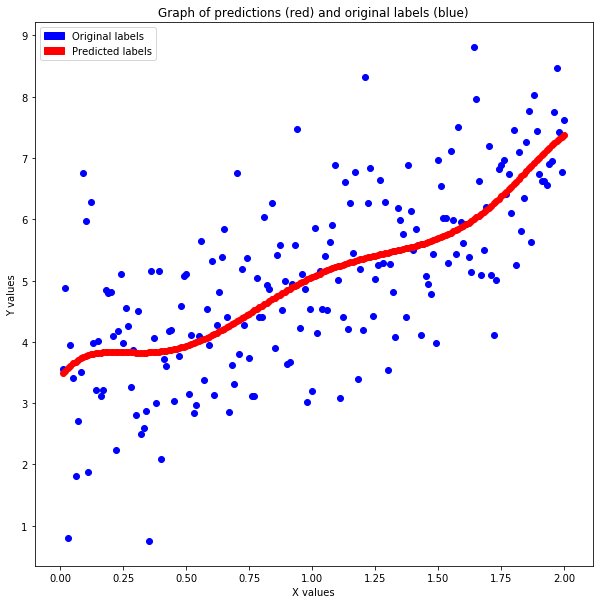

The weight for closed form linear regression for x^7 is: 
[  17.3114673  -104.72227912  270.37451239 -343.19084352  229.48681942
  -77.69332825   10.51443512    2.98164468]
The training error for x^7 is 
0.5562352515818955


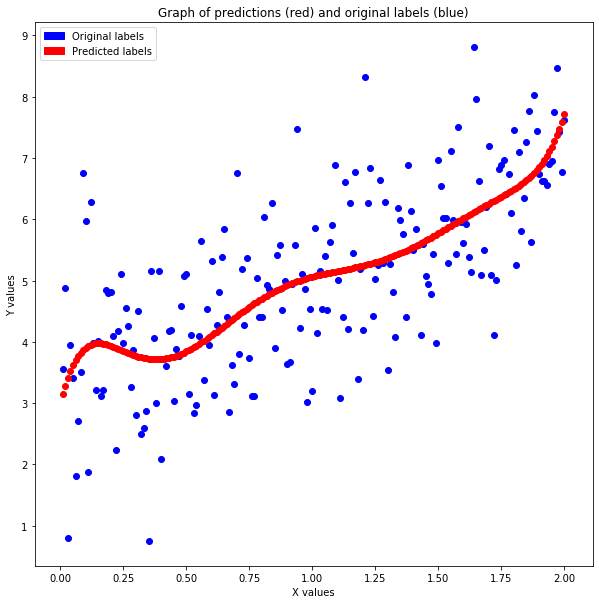

The weight for closed form linear regression for x^8 is: 
[  28.70152146 -201.17758805  617.80818915 -987.05634451  893.36494207
 -462.31539321  127.58317083  -14.56078754    2.63575715]
The training error for x^8 is 
0.5537805799114248


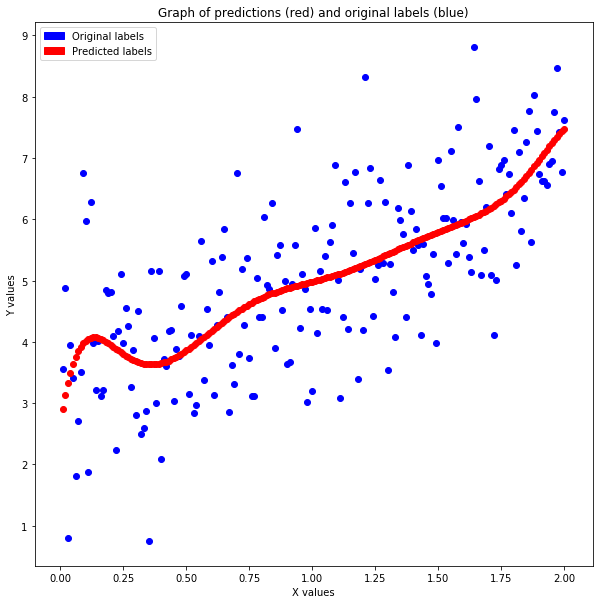

The weight for closed form linear regression for x^9 is: 
[   37.81742316  -297.49167871  1057.60617256 -2044.05599213
  2358.11627197 -1673.23023987   716.7915535   -170.18796539
    17.20585519     2.40963278]
The training error for x^9 is 
0.5529231266275894


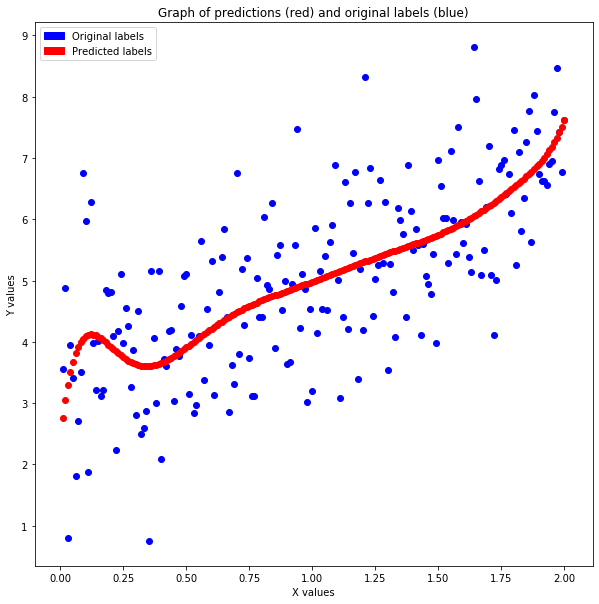

The weight for closed form linear regression for x^10 is: 
[   30.26208973  -201.01969528   514.85028076  -409.68939209
  -548.37231445  1526.20214844 -1486.42932129   753.33996582
  -198.21221161    21.43407631     2.56539511]
The training error for x^10 is 
0.5527115822070795


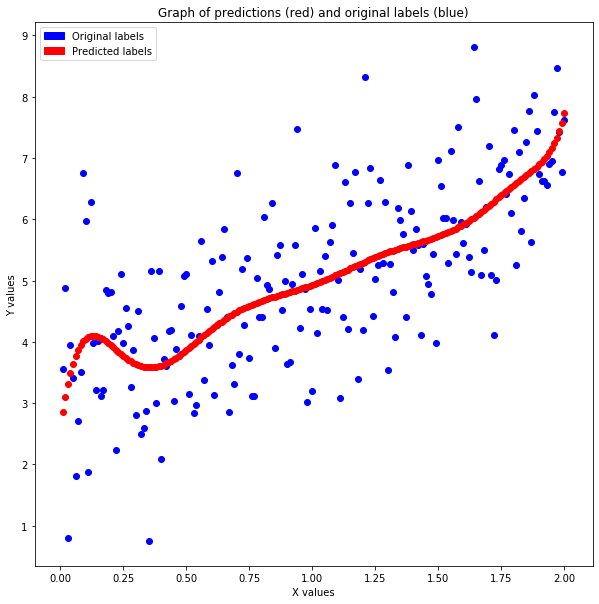

The weight for closed form linear regression for x^11 is: 
[-1.50364838e+01  4.96299835e+02 -4.21267017e+03  1.69544287e+04
 -3.88707930e+04  5.52015430e+04 -5.03293242e+04  2.95313945e+04
 -1.07861528e+04  2.23188196e+03 -1.99889847e+02  3.37472385e+00]
The training error for x^11 is 
0.5497611315990948


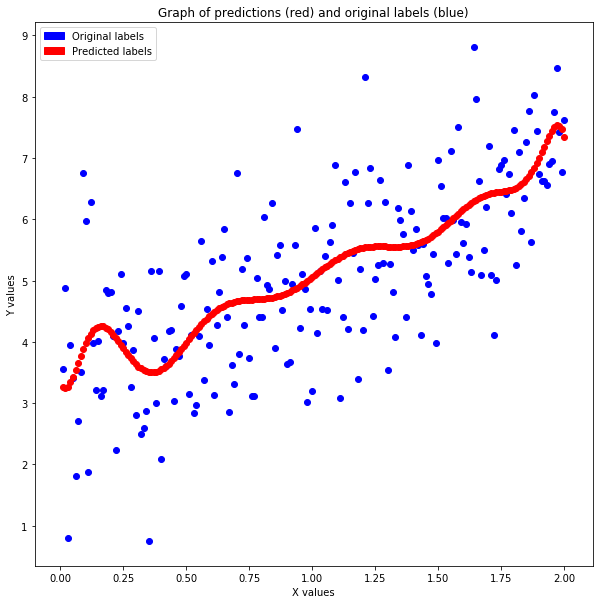

The weight for closed form linear regression for x^12 is: 
[ 1.23441711e+02 -1.36649414e+03  9.98467188e+03 -4.39074375e+04
  1.20642312e+05 -2.15550875e+05  2.56594250e+05 -2.04964625e+05
  1.08449250e+05 -3.64378750e+04  7.03669922e+03 -5.94574463e+02
  1.70626736e+00]
The training error for x^12 is 
37.71886338337176


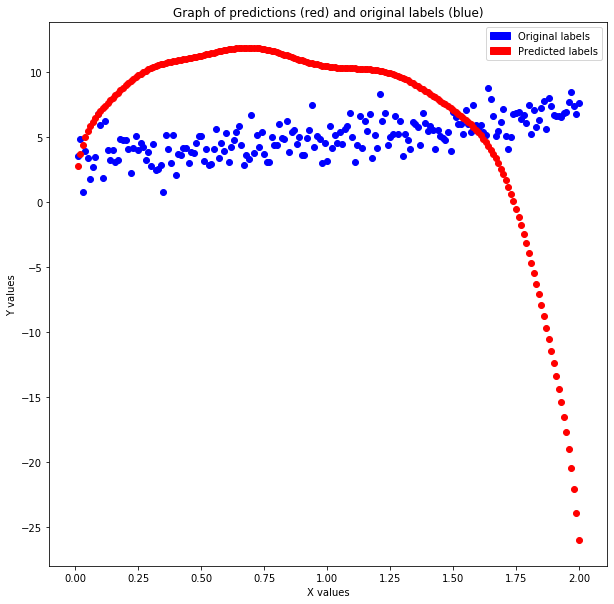

The weight for closed form linear regression for x^13 is: 
[-4.26090813e+01  8.24919525e+02 -6.52980200e+03  2.59452412e+04
 -5.91069590e+04  8.18378984e+04 -6.83808066e+04  2.99665820e+04
 -6.24550781e+02 -6.74760547e+03  3.62509668e+03 -8.45320190e+02
  7.77032928e+01  3.68226236e+00]
The training error for x^13 is 
2.64928675131993


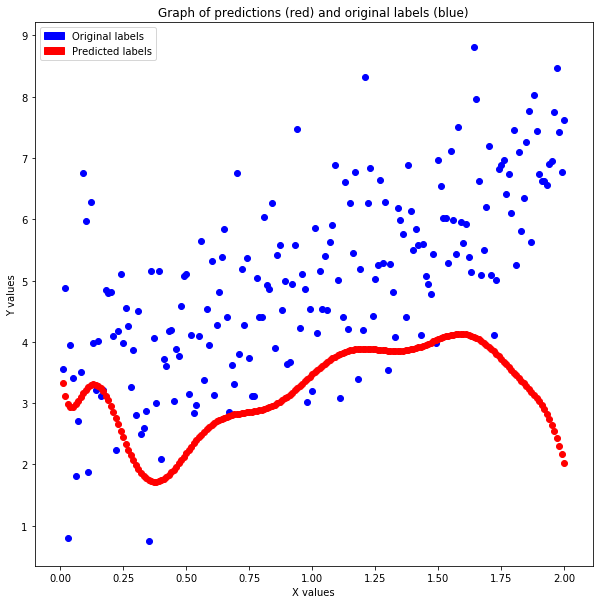

The weight for closed form linear regression for x^14 is: 
[-4.32119846e+01  8.11774109e+02 -6.54627246e+03  2.62200879e+04
 -6.02425156e+04  8.45410000e+04 -7.23960078e+04  3.37258594e+04
 -2.72634375e+03 -6.21930469e+03  3.72768555e+03 -9.62622559e+02
  1.10899780e+02 -3.40127945e+00  3.67769596e+00]
The training error for x^14 is 
6.41704965994919


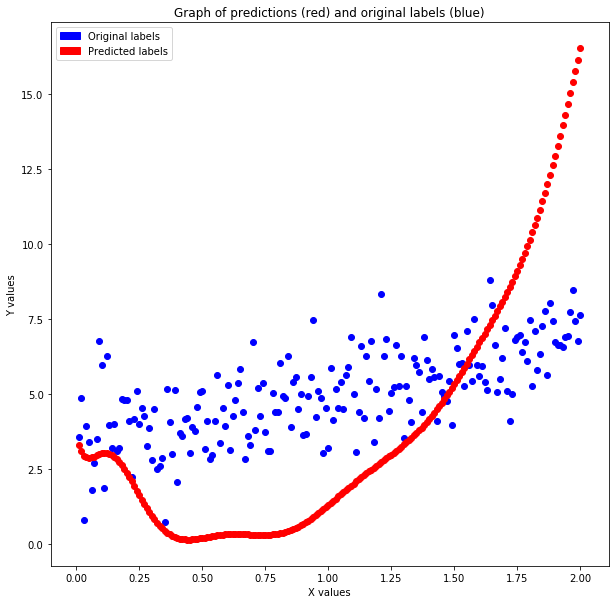

The weight for closed form linear regression for x^15 is: 
[ 5.43957405e+01  9.50643311e+01 -2.08321045e+03  7.04702539e+03
 -7.79444531e+03 -8.08268750e+03  3.33965312e+04 -4.02461719e+04
  2.06943398e+04  1.62994531e+03 -8.60614453e+03  5.22696289e+03
 -1.55318359e+03  2.33625732e+02 -1.38703766e+01  3.26137006e+00]
The training error for x^15 is 
52.64237918791936


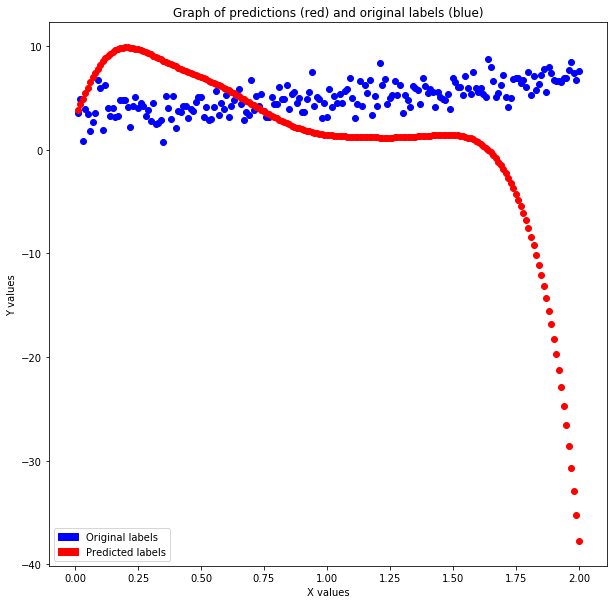

The weight for closed form linear regression for x^16 is: 
[-3.40955872e+02 -2.00546191e+03  1.53335195e+04 -6.08331719e+04
  1.48700031e+05 -2.16347562e+05  1.66040219e+05 -1.73637031e+04
 -9.30460938e+04  9.94252500e+04 -5.88567812e+04  2.87162422e+04
 -1.36386133e+04  5.14552441e+03 -1.15965527e+03  1.11498871e+02
  1.20495367e+00]
The training error for x^16 is 
5861.966076005915


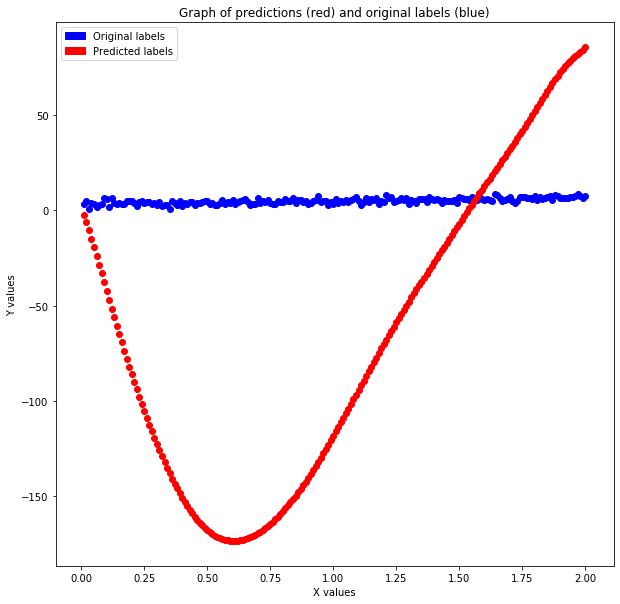

In [37]:
dimension2, training_error2 = gatherFitForDimensions(2, 16)

In [38]:
error_frame2 = pd.DataFrame()
error_frame2['dimension'] = dimension2
error_frame2['error'] = training_error2
error_frame2

,dimension,error
0,2,0.570302
1,3,0.570084
2,4,0.564616
3,5,0.563897
4,6,0.561343
5,7,0.556235
6,8,0.553781
7,9,0.552923
8,10,0.552712
9,11,0.549761


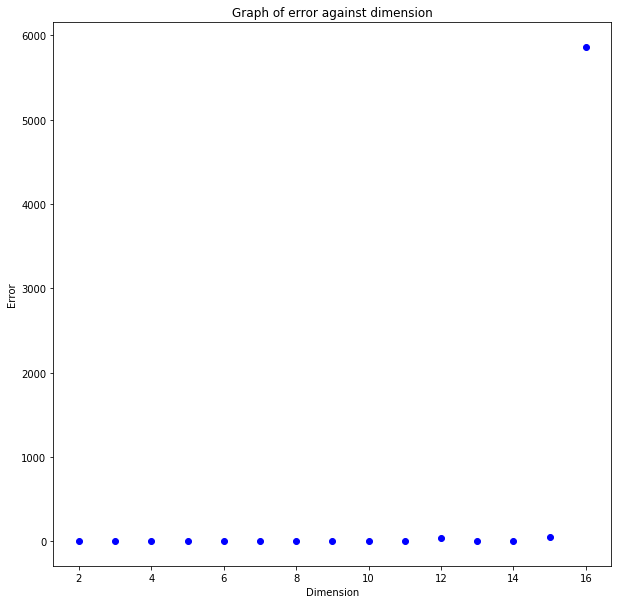

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x=error_frame2['dimension'], y=error_frame2['error'], color='b')
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Graph of error against dimension')
plt.show()

In [40]:
min_error2 = min(error_frame2['error'])
min_dimension2 = error_frame2.loc[error_frame2['error']==min_error2, 'dimension'].iloc[0]
print('Dimension {} has the smallest error, with an error of {}'.format(min_dimension2, min_error2))

Dimension 11 has the smallest error, with an error of 0.5497611315990948


Order 12 onwards produces a worse fit as the error increases